<a href="https://colab.research.google.com/github/javeed999/DSA/blob/main/3_0_KNNRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## KNN Regressor

In [16]:
from sklearn.datasets import make_regression
import pandas as pd
x, y = make_regression(n_samples=1000, n_features=2, noise=10, random_state=42)
x=pd.DataFrame(x)

In [17]:
x

,0,1
0,-0.167118,0.146714
1,-0.020902,0.117327
2,0.150419,0.364961
3,0.555604,0.089581
4,0.058209,-1.142970
...,...,...
995,-0.753965,-0.280675
996,-2.172670,0.847422
997,0.302635,-0.754276
998,0.381935,0.430042


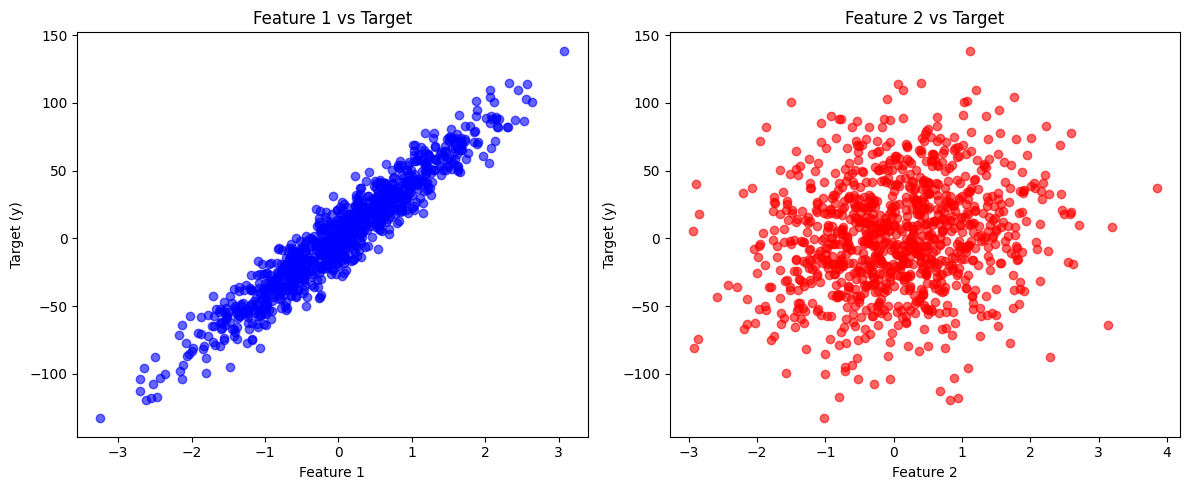

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Feature 1 vs Target
plt.subplot(1,2,1)
plt.scatter(x[0], y, color="blue", alpha=0.6 )
plt.xlabel("Feature 1")
plt.ylabel("Target (y)")
plt.title("Feature 1 vs Target")

# Feature 2 vs Target
plt.subplot(1,2,2)
plt.scatter(x[1], y, color="red", alpha=0.6)
plt.xlabel("Feature 2")
plt.ylabel("Target (y)")
plt.title("Feature 2 vs Target")

plt.tight_layout()
plt.show()


In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [48]:
regressor=KNeighborsRegressor(n_neighbors=2,algorithm='auto')
regressor.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [49]:
y_pred=regressor.predict(X_test)

In [50]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [51]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.8982706122254747
10.136196150558076
159.9344824040746


In [52]:
from sklearn.model_selection import GridSearchCV
params={"n_neighbors":[1,2,3,4,5,6,7,8,9,10],"algorithm":["auto",'ball_tree', 'kd_tree', 'brute']}
grid=GridSearchCV(estimator=regressor,cv=5,param_grid=params)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=2),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [53]:
y_pred1=grid.predict(x_test)
print(r2_score(y_test,y_pred1))
print(mean_absolute_error(y_test,y_pred1))
print(mean_squared_error(y_test,y_pred1))

0.9190743939278913
8.949111514931198
127.22768910263548


In [54]:
grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 7}